In [5]:
!pip install gensim

In [3]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 

In [4]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import zipfile
import datetime as dt
import konlpy
import re
import gensim
import gensim.corpora as corpora
import cartopy.crs as ccrs  ##  Cartopy의 좌표 참조 시스템을 ccrs로 가져옴
import cartopy.feature as cfeature  ## Cartopy의 지형 및 해양 기능을 cfeature로 가져옴
from scipy.spatial import distance
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime, date, time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

plt.rc('font', family='malgun gothic')    # 한글처리
plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [7]:
reviews_df = pd.read_csv('data/senti/reviews_data.csv',encoding='cp949')
reviews_df.head(3)

,Unnamed: 0,content,score,time
0,1,야놀자 믿고 가는거야~떠나보는거야~~^^,5,2017-04-29
1,2,좋아요,5,2019-05-21
2,3,감사합니다,5,2018-02-27


In [8]:
# 텍스트를 토큰화하는 함수 정의
def tokenize(text): 
    filtered = re.sub('[^,.?!\w\s]','', text)  ## 한글을 제외한 문자 삭제
    
    # Okt 형태소 분석기를 사용하여 토큰화
    okt = konlpy.tag.Okt() 
    morphs = okt.pos(filtered)
    
    words = []
    for word, pos in morphs:           ## 명사,동사,형용사만 words리스트에 추가
        if pos == 'Adjective' or pos == 'Noun' or pos == 'Verb': 
            words.append(word)

    words_str = ' '.join(words)  ## words리스트의 단어들을 공백으로 연결
    return words_str

In [10]:
X = []
y = []

for score, content in zip(reviews_df['score'], reviews_df['content']):
    tokenized_content = tokenize(content)  ## content를 토큰화
    X.append(tokenized_content)   ## 토큰화된 내용을 X리스트에 추가
    
    y.append(1 if score > 3 else -1)  ## 평점이 3보다 크면 '1', 그렇지않으면 '-1'
    
print(f'text 수: {len(reviews_df)}')     ## 전체 리뷰 개수

## X : 각 리뷰의 토큰화된 내용
## y : 각 리뷰의 레이블(1 또는 -1)

text 수: 5999


In [12]:
X_train, X_test, y_train, y_test = \
                            train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
## 텍스트를 토큰화할 때 각 단어를 개별적으로 고려하여
## 적어도 하나의 문장에 나타나는 모든 단어를 포함
tf_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
X_train_tf = tf_vectorizer.fit_transform(X_train)  
X_test_tf = tf_vectorizer.transform(X_test)

vocablist = [word for word, number 
                 in sorted(tf_vectorizer.vocabulary_.items(), key=lambda x:x[1])]  
## 단어들을 번호 기준 내림차순 저장

In [14]:
vocablist

['가게',
 '가게되',
 '가겠더라구요',
 '가겠어요',
 '가격',
 '가고',
 '가고싶다',
 '가고싶었던',
 '가고싶은',
 '가기',
 '가기전에',
 '가까우',
 '가까운',
 '가까운데',
 '가까이',
 '가깝고',
 '가끔',
 '가는',
 '가는거라서',
 '가는거야',
 '가는게',
 '가는데',
 '가는데도',
 '가는지',
 '가능',
 '가능하게',
 '가능하고',
 '가능하네요',
 '가능하니',
 '가능하니깐',
 '가능하다',
 '가능하다고',
 '가능하다는',
 '가능하다는데도',
 '가능하련',
 '가능하면',
 '가능한',
 '가능한거랑',
 '가능한게',
 '가능합니다',
 '가능해서',
 '가더',
 '가도',
 '가독성',
 '가득',
 '가든',
 '가라',
 '가라는말',
 '가랑',
 '가량',
 '가려고',
 '가려서',
 '가려져있고',
 '가로',
 '가리면서',
 '가맹',
 '가며',
 '가면',
 '가뭄',
 '가보',
 '가보고',
 '가보면',
 '가보진',
 '가본',
 '가봄',
 '가봅니다',
 '가봐야',
 '가봐요',
 '가서',
 '가성',
 '가세',
 '가쉽',
 '가식',
 '가안',
 '가야',
 '가에',
 '가요',
 '가원',
 '가입',
 '가장',
 '가쟈',
 '가제',
 '가져가네요',
 '가져가는지',
 '가져가지',
 '가져올',
 '가족',
 '가지',
 '가짐',
 '가치',
 '가타',
 '가하고',
 '각종',
 '간곳',
 '간다는것도',
 '간다는게',
 '간단',
 '간단명료',
 '간단하게',
 '간단하고',
 '간단하구',
 '간단한',
 '간단해',
 '간단해서',
 '간단히',
 '간반',
 '간전',
 '간지나면',
 '간편',
 '간편하게',
 '간편하고',
 '간편하구',
 '간편하군요',
 '간편하네요',
 '간편하니',
 '간편하다',
 '간편하다는',
 '간편한',
 '간편함',
 '간편합니다',
 '간편합니당',
 '간편해',

In [15]:
model = LogisticRegression(random_state=0)
model.fit(X_train_tf, y_train) 

LogisticRegression(random_state=0)

In [17]:
LogisticRegression(max_iter=100, 
                    multi_class='auto', penalty='l2',random_state=0,  verbose=0)

## max_iter=100 : 최대 반복 횟수
## multi_class='auto' : 기본값
## penalty='l2' : 기본값
## verbose=0 : 출력되는 메시지의 양 (출력 없음)

LogisticRegression(random_state=0)

In [18]:
y_test_pred = model.predict(X_test_tf) ## 예측수행
print('Misclassified samples: {} out of {}'.format((y_test_pred != y_test).sum(),
                                    len(y_test)))  ## 잘못 분류된 샘플 개수 확인

print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_test_pred))) ## 정확도

Misclassified samples: 77 out of 1200
Accuracy: 0.9358


In [19]:
coefficients = model.coef_.tolist() ## 모델에서 계수를 가져와서 리스트로 변환
sorted_coefficients = sorted(enumerate(coefficients[0]), key=lambda x:x[1], reverse=True)
print('긍정적인 단어 Top 30 (높은 평점과 상관관계가 높은 단어들)')
for word_num, coef in sorted_coefficients[:30]:
    print('{0:}({1:.3f})'.format(vocablist[word_num], coef))
    
## enumerate() : 단어의 인덱ㄷ스와 계수를 튜플로     

긍정적인 단어 Top 30 (높은 평점과 상관관계가 높은 단어들)
좋아요(1.492)
좋은(1.478)
좋아용(1.243)
조아요(1.119)
좋음(1.029)
먼저(1.010)
좋습니다(1.010)
있어요(0.970)
있습니다(0.945)
항상(0.937)
콜센터(0.936)
좋아여(0.896)
완전(0.836)
도움(0.828)
편리해요(0.813)
문의(0.794)
편리하네요(0.751)
좋네요(0.745)
여행(0.741)
자주(0.714)
간편하고(0.702)
좋고(0.701)
해서(0.695)
비교(0.687)
편해요(0.684)
가야(0.684)
빠르고(0.658)
저렴하게(0.654)
최고(0.645)
편리함(0.631)


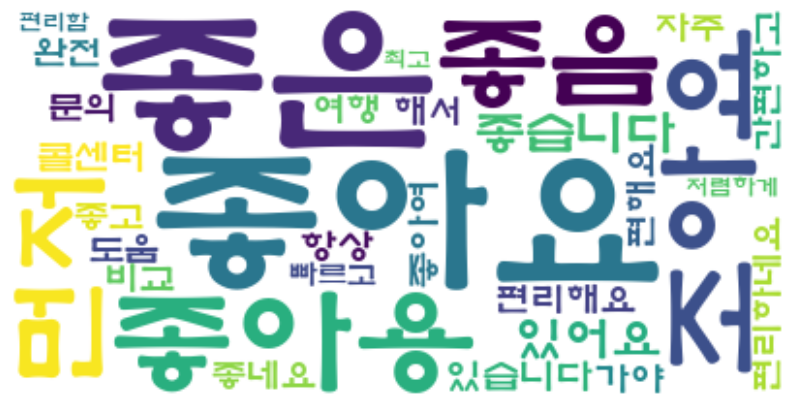

In [21]:
from wordcloud import WordCloud
positive_df = pd.DataFrame({'단어': [vocablist[word_num] for word_num, _ in sorted_coefficients[:30]],
                           '계수': [coef for _, coef in sorted_coefficients[:30]]})

font_path = "c:/Windows/fonts/HMFMOLD.TTF"
word_freq = {word: coef for word, coef in zip(positive_df['단어'], positive_df['계수'])}

wordcloud = WordCloud(font_path=font_path, background_color='white').generate_from_frequencies(word_freq)



plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()